# Logger examples

In [1]:
!pip install lavague

import os
# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
else:
    os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

selenium_driver = SeleniumDriver(headless=True)
action_engine = ActionEngine(selenium_driver)
world_model = WorldModel()

agent = WebAgent(world_model, action_engine)

agent.get("https://huggingface.co/")
agent.run("Go to the first Model in the Models section")

# Retrieve pandas DataFrame with logs
df_logs = agent.logger.return_pandas()

2024-06-05 18:29:51,904 - INFO - Screenshot folder cleared
2024-06-05 18:30:01,541 - INFO - Thoughts:
- The current screenshot shows the homepage of Hugging Face.
- The objective is to go to the first model in the Models section.
- The Models section is visible on the right side of the screenshot.
- The first model listed in the Models section is "OpenGPT 4.0".
- The next step is to click on the "OpenGPT 4.0" model to navigate to its page.

Next engine: Navigation Engine
Instruction: Click on the "OpenGPT 4.0" model in the Models section on the right side of the page.
2024-06-05 18:30:29,032 - INFO - Thoughts:
- The current screenshot shows a loading page for the "OpenGPT 4.0" model.
- The objective is to go to the first model in the Models section.
- The page is still loading, so we need to wait for it to fully load before taking further action.

Next engine: Navigation Controls
Instruction: WAIT for 5 seconds.
2024-06-05 18:30:34,986 - INFO - Thoughts:
- The current screenshots show 

In [4]:
# Pandas option to ensure we show all text in column
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Print the code generated for step 0 of our run
step = 0
print(df_logs.at[step, 'code'])

# Let's think step by step

# First, we notice that the query asks us to click on the "OpenGPT 4.0" model in the Models section on the right side of the page.

# In the provided HTML, we see that the "OpenGPT 4.0" model is represented by an <h4> element with the text "OpenGPT 4o".

# This <h4> element is within an <a> tag, which is the clickable link we need to interact with.

# The <a> tag containing the "OpenGPT 4.0" model can be identified by its XPath:
# /html/body/div/main/div[2]/div[2]/div[3]/div/article[1]/a

# Thus, we use this XPath to identify and click on the "OpenGPT 4.0" model:
opengpt_4o_model = driver.find_element(By.XPATH, "/html/body/div/main/div[2]/div[2]/div[3]/div/article[1]/a")
opengpt_4o_model.click()


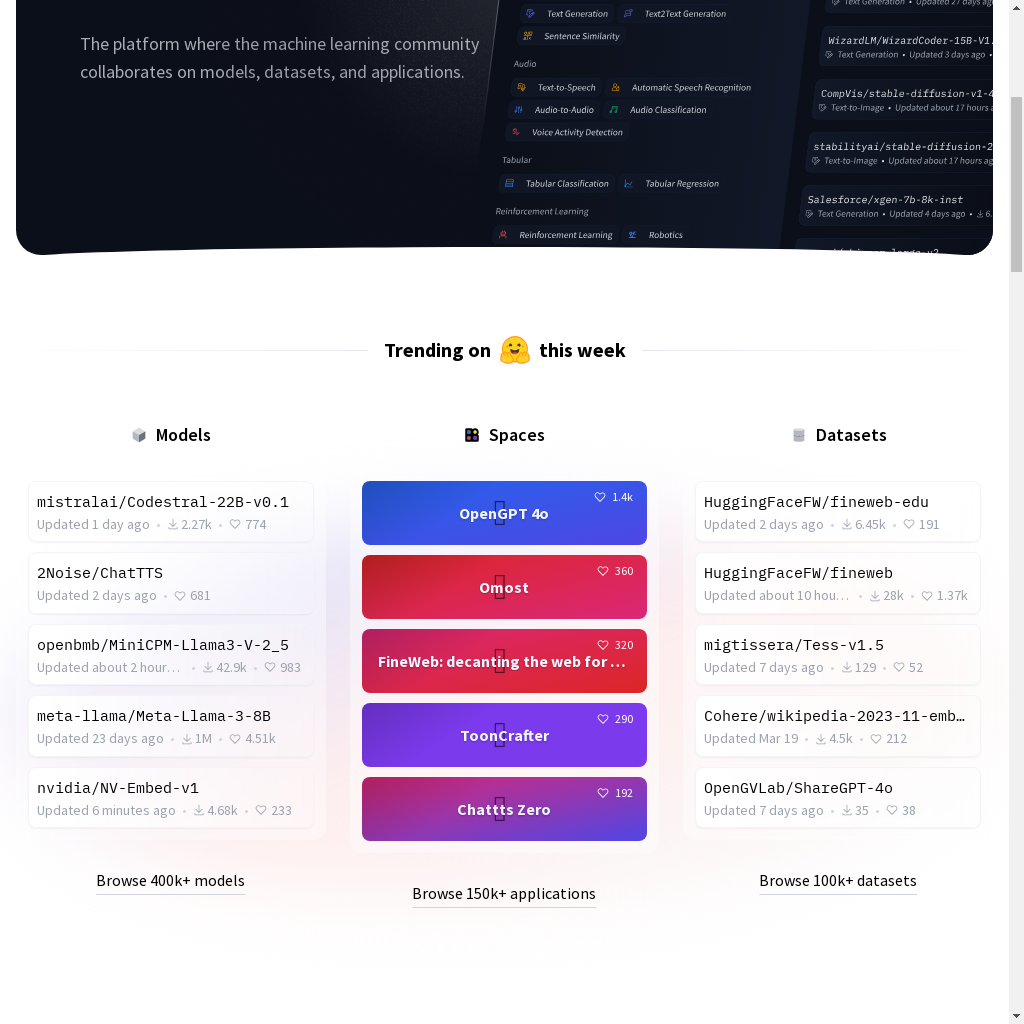

In [6]:
from IPython.display import display

step = 0
image = 0
display(df_logs["screenshots"][step][image])

In [7]:
# Print the World Model thoughts generated for step 0 of our run
step = 0
print(df_logs.at[step, 'world_model_output'])

Thoughts:
- The current screenshot shows the homepage of Hugging Face.
- The objective is to go to the first model in the Models section.
- The Models section is visible on the right side of the screenshot.
- The first model listed in the Models section is "OpenGPT 4.0".
- The next step is to click on the "OpenGPT 4.0" model to navigate to its page.

Next engine: Navigation Engine
Instruction: Click on the "OpenGPT 4.0" model in the Models section on the right side of the page.


### Advanced example

In [8]:
from lavague.drivers.selenium import SeleniumDriver
from lavague.core.logger import AgentLogger
from lavague.core import ActionEngine

selenium_driver = SeleniumDriver(headless=True, url="https://huggingface.co/")
action_engine = ActionEngine(
    driver=selenium_driver,
)

# Initialize your logger
logger = AgentLogger()

In [9]:
# Start a new logging run
logger.new_run()

# Add logging to NavigationEngine
action_engine.navigation_engine.set_logger(logger)

obs = selenium_driver.get_obs()

In [10]:
# Engine & instruction
engine_name = "Navigation Engine"
instruction = "scroll down by 200px"

# Execute the instruction
success, output = action_engine.dispatch_instruction(engine_name, instruction)

# Add required driver info to logs and end the logging step
logger.add_log(obs)
logger.end_step()

# Retrieve and print logs as a pandas DataFrame
df_logs = logger.return_pandas()